In [33]:
import pandas as pd
housing = pd.read_csv('house_price_chiyuan.csv')
# 生成的数据前两列是没意义的，将其删除
del housing['Unnamed: 0']
del housing['Unnamed: 1']
print(housing.head())
housing['decoration_level'][1]
# 注意到有一些数据的位置是空格。后面需要将其删除

    area decoration_level distance_to_metro  house_price  num_floor  rooms  \
0  56.37                                793        260.0          6      3   
1  71.00                                545        650.0         16      4   
2  89.99               中装               659        598.0         23      3   
3  57.04               中装               370        380.0          6      3   
4  64.77               简装               616        140.0         16      3   

   unit_price  
0       46124  
1       91549  
2       66452  
3       66620  
4       21615  


' '

In [34]:
# 第一步：数据概览
# print(housing['decoration_level'].value_counts())
housing.describe()

,area,house_price,num_floor,rooms,unit_price
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,83.310280,562.459867,13.388000,3.374667,69556.805333
std,34.855508,294.782690,7.846329,1.008455,25577.987281
min,21.810000,130.000000,2.000000,1.000000,21615.000000
25%,59.207500,370.000000,6.000000,3.000000,52115.250000
50%,73.895000,480.000000,12.000000,3.000000,64961.500000
75%,96.985000,660.000000,20.000000,4.000000,81223.500000
max,271.880000,2900.000000,35.000000,7.000000,162945.000000


In [35]:
#注意：apply方法不能对整个DataFrame使用，只能用于某一个colomn
import numpy as np
f = lambda x: np.NaN if str(x).isspace() else x
housing['decoration_level'] = housing['decoration_level'].apply(f)
# housing['decoration_level'][1]
housing['distance_to_metro'] = housing['distance_to_metro'].apply(f)
housing[1:20]

,area,decoration_level,distance_to_metro,house_price,num_floor,rooms,unit_price
1,71.00,NaN,545,650.0,16,4,91549
2,89.99,中装,659,598.0,23,3,66452
3,57.04,中装,370,380.0,6,3,66620
4,64.77,简装,616,140.0,16,3,21615
5,73.63,NaN,426,380.0,18,3,51609
6,75.03,NaN,153,465.0,16,3,61975
7,139.09,简装,230,1200.0,25,5,86275
8,85.37,简装,559,850.0,18,3,99567
9,75.95,中装,502,630.0,18,4,82949
10,63.43,毛坯,757,370.0,6,3,58332


In [36]:
housing['decoration_level'].isnull().value_counts()

False    571
True     179
Name: decoration_level, dtype: int64

In [37]:
print(housing.info())
print('是否有数据丢失：',any(housing.isnull()==True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
area                 750 non-null float64
decoration_level     571 non-null object
distance_to_metro    696 non-null object
house_price          750 non-null float64
num_floor            750 non-null int64
rooms                750 non-null int64
unit_price           750 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 41.1+ KB
None
是否有数据丢失： True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210ED590C50>,
      dtype=object)

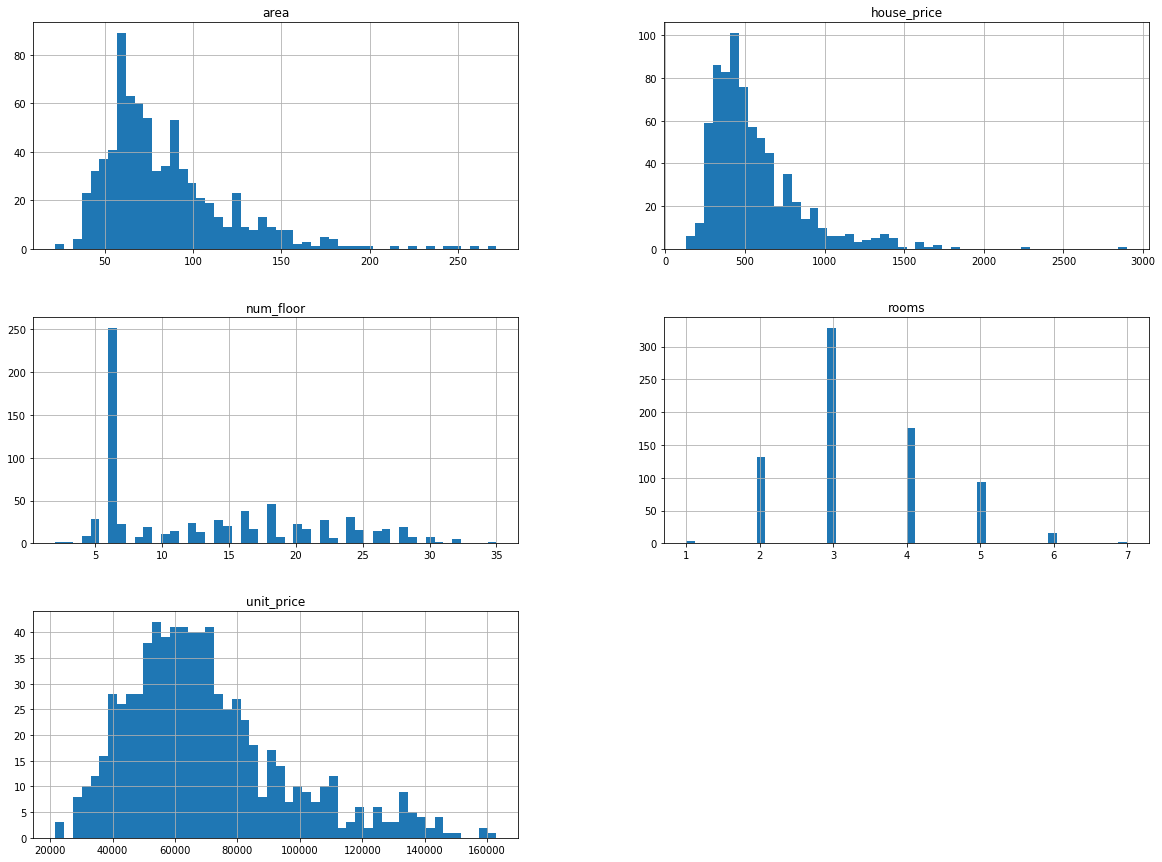

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

In [39]:
# 注意：在进一步观察数据之前，先将训练测试集分开，并且保证不能看到测试集
# from sklearn.model_selection import train_test_split
# Data_train,Data_test = train_test_split(housing, test_size = 0.2, random_state = 42)
# 最好使用分层抽样,同时设置一个固定的随机种子.(要分层抽样，最好先将label分成几个大类)
# 注意：这里先不着急在训练集中drop掉房价属性

# from sklearn.model_selection import StratifiedShuffleSplit
# spl = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
# housing_data= housing.drop(['house_price'],axis=1)
# housing_label = housing['house_price'].copy()
# for train_index, text_index in spl.split(housing_data, housing_label):
#     X_train = housing_data[train_index]
#     y_train = housing_label[train_index]
#     X_test = housing_data[text_index]
#     y_test = housing_label[text_index]
# X_train.shape

In [40]:
from sklearn.model_selection import train_test_split
hs_train, hs_test = train_test_split(housing, test_size=0.2,random_state=42)


In [41]:
hs = hs_train.copy()
corr_matrix = hs.corr()
corr_matrix['house_price'].sort_values(ascending=False)

house_price    1.000000
area           0.705635
rooms          0.598759
unit_price     0.507596
num_floor      0.168905
Name: house_price, dtype: float64

G:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210EE062DA0>,
      dtype=object)

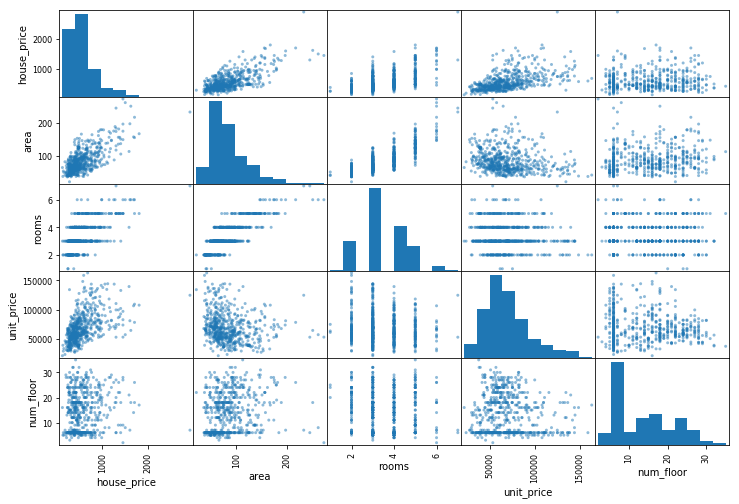

In [42]:
from pandas.tools.plotting import scatter_matrix
attributes = ['house_price','area','rooms','unit_price','num_floor']
scatter_matrix(hs[attributes],figsize = (12,8))

In [43]:
#分离数据X 和结果 house_price
housing_label = hs_train['house_price'].copy()
housing_data = hs_train.drop('house_price',axis=1)
hs_label = hs_train['house_price'].copy()
hs_data = hs_train.drop('house_price',axis=1)
hs_num = hs_data.drop('decoration_level',axis=1)
hs_txt = hs_data['decoration_level'].copy()

In [44]:
# #注意：必须先将decoration_level中的NaN元素处理，否则无法使用LabelEncoder 进行转换
# print(hs_txt[0:5])
# f1 = lambda x:x.where(x.notnull(), None)
# #创建自己的transformer(虽然有点low，但是流程是这样的)
# from sklearn.base import BaseEstimator, TransformerMixin
# class Nan_to_zero(BaseEstimator, TransformerMixin):
#     def __init__(self,attribute_name):
#         self.attribute_name = attribute_name
#     def fit(self,X,y=None):
#         return self
#     def transform(self, X, y=None):
#         return X[self.attribute_name].where(X[self.attribute_name].notnull(),'未录入')
# #         return X.replace(to_replace =np.NaN, value = '未录入')
# nan_to_z = Nan_to_zero(['decoration_level'])
# hs_data['decoration_level'] = nan_to_z.fit_transform(hs_data)
# print(hs_data['decoration_level'][0:4])

In [45]:
#注意：必须先将decoration_level中的NaN元素处理，否则无法使用LabelEncoder 进行转换
print(hs_txt[0:5])
f1 = lambda x:x.where(x.notnull(), None)
#创建自己的transformer(虽然有点low，但是流程是这样的)
from sklearn.base import BaseEstimator, TransformerMixin
class Nan_to_zero(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self, X, y=None):
        X = pd.DataFrame(X)
        return X.where(X.notnull(),'未录入')
#         return X.replace(to_replace =np.NaN, value = '未录入')
nan_to_z = Nan_to_zero()
hs_data['decoration_level'] = nan_to_z.fit_transform(hs_data['decoration_level'])
print(hs_data['decoration_level'][0:4])

595    NaN
131     精装
44      中装
70      精装
672     中装
Name: decoration_level, dtype: object
595    未录入
131     精装
44      中装
70      精装
Name: decoration_level, dtype: object


In [46]:
any(hs_data['decoration_level'].notnull())


True

In [47]:
# 准备pipeline 对数据进行预处理
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
hs_data['decoration_level'] = encoder.fit_transform(hs_data['decoration_level'])
# 输入为pandas.core.series.Series类型

In [48]:
print( hs_data['decoration_level'][0:4])

595    1
131    4
44     0
70     4
Name: decoration_level, dtype: int64


In [49]:
hs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 595 to 102
Data columns (total 6 columns):
area                 600 non-null float64
decoration_level     600 non-null int64
distance_to_metro    553 non-null object
num_floor            600 non-null int64
rooms                600 non-null int64
unit_price           600 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 32.8+ KB


In [50]:
################################################ 至此已经将text 属性：装修水平处理完毕#############################
############ 接下来处理不完整数据： distance_to_metro #######
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
imputer.fit(hs_data)
imputered_data = imputer.transform(hs_data)
# 注意：处理后的data从dataframe变成了np array类型

In [51]:
# 将imputer之后的结果显示以df的形式：
pd.DataFrame(imputered_data, columns=hs_data.columns)[1:6]

,area,decoration_level,distance_to_metro,num_floor,rooms,unit_price
1,64.95,4.0,502.0,12.0,3.0,81601.0
2,63.36,0.0,549.0,24.0,2.0,46559.0
3,103.01,4.0,211.0,24.0,4.0,59703.0
4,95.68,0.0,619.0,22.0,3.0,63754.0
5,68.10,3.0,371.0,5.0,4.0,59471.0


In [52]:
 Imputer(strategy = 'median').fit_transform(housing_data.drop('decoration_level',axis=1))

array([[7.10000e+01, 1.15100e+03, 1.30000e+01, 3.00000e+00, 1.21127e+05],
       [6.49500e+01, 5.02000e+02, 1.20000e+01, 3.00000e+00, 8.16010e+04],
       [6.33600e+01, 5.49000e+02, 2.40000e+01, 2.00000e+00, 4.65590e+04],
       ...,
       [4.21000e+01, 1.32400e+03, 1.70000e+01, 2.00000e+00, 1.62945e+05],
       [1.81150e+02, 7.06000e+02, 2.60000e+01, 5.00000e+00, 7.49650e+04],
       [5.98000e+01, 2.76000e+02, 1.20000e+01, 3.00000e+00, 1.03679e+05]])

In [53]:
############################################## 开始建立一个pipeline ########################
from sklearn.pipeline import FeatureUnion,Pipeline
from sklearn.preprocessing import LabelBinarizer, StandardScaler, Imputer
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y = None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)
num_attribute = list(housing_data.drop('decoration_level',axis = 1))
hs_data_num = housing_data.drop('decoration_level',axis=1)
num_pipe_line = Pipeline([
    ('selector',DataFrameSelector(num_attribute)),
#     ('Nan_to_z',Nan_to_zero(['decoration_level'])),
#     ('label_binarizer',LabelBinarizer()),
    ('imputer',Imputer(strategy = "median")), #注意Imputer要指定填充的方式
    ('std_scaler', StandardScaler()),
])
txt_pipe_line = Pipeline([
    ('selector',DataFrameSelector(['decoration_level'])),
    ('nan_to_zero',Nan_to_zero()),
    ('label_binarizer',CustomLabelBinarizer())
])
full_pipeline = FeatureUnion(transformer_list=[
    ('pipe_line1',num_pipe_line),
    ('pipe_line2',txt_pipe_line)
])
housing_prepared = full_pipeline.fit_transform(housing_data)

In [54]:
pd.DataFrame(housing_prepared)[1:5] ## 注意到：最后一列变成了五列（one-hot）形式！

,0,1,2,3,4,5,6,7,8,9,10
1,-0.554703,-0.524542,-0.201648,-0.413117,0.495616,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.599082,-0.372604,1.337976,-1.396729,-0.900467,1.0,0.0,0.0,0.0,0.0,0.0
3,0.507608,-1.465266,1.337976,0.570495,-0.376806,0.0,0.0,0.0,0.0,1.0,0.0
4,0.303017,-0.146313,1.081372,-0.413117,-0.215413,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
##################################### 训练模型 #####################################
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_label)
some_data = housing_data.iloc[:1000]  #注意：这里如果取得样本不够多，可能出现one-hot不足五列的情况
some_label = housing_label.iloc[:1000]
some_data_prepared = full_pipeline.fit_transform(some_data)
print('预测值：',lin_reg.predict(some_data_prepared[:5]))
print('实际值为：', list(some_label[:5]))

预测值： [866.4787941  536.88849055 256.43853326 653.57899504 609.53916507]
实际值为： [860.0, 530.0, 295.0, 615.0, 610.0]


In [56]:
######################################## 初步评估模型 #########################################
housing_prediction = lin_reg.predict(housing_prepared)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_prediction, housing_label)
print(np.sqrt(lin_mse))

83.05598341913064


In [57]:
######################################## 评估模型 ############################################
from sklearn.cross_validation import cross_val_score
def display_scores(score):
    print('score: ',score)
    print('Mean :',score.mean())
    print('Standard Deviation ：',score.std())
score_lin_reg = cross_val_score(lin_reg, housing_prepared,housing_label, cv = 5, scoring = 'neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-score_lin_reg)
display_scores(lin_rmse_scores)

score:  [ 78.42784189  82.81273758  59.15016653 109.7264201   83.27630723]
Mean : 82.6786946669625
Standard Deviation ： 16.14692506318528
